Use the preprocessed data to build the model

In [155]:
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
import glob
import numpy as np

def load_image(file_name):
    img = Image.open(file_name)
    #img = img.convert('1')
    img = np.array(img,np.uint8)
    
    a = img[100:,:].reshape(-1)
    b = img[:100,:100].reshape(-1)
    data = np.append(b,a)

    return data

In [156]:
a = np.array([1,2,3])
b = np.array([4,5,6])
np.append(a,b)

array([1, 2, 3, 4, 5, 6])

In [157]:
#import the pictures taken by ourselves
new_x_test = []
new_y_test = []

y_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R','S','T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'del']

for i in range(0, len(y_label)):
    path = '/Users/qintaoying/Desktop/STAT-479/GP/asl-alphabet/pre_data/test0/'+ y_label[i] +'/*.jpg'
    for filename in glob.glob(path):
        im = load_image(filename)
        new_x_test.append(im)
        new_y_test.append(i)
        
print(new_x_test)
print(new_y_test)

[array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255, 255, 255], dtype=uint8), array([255, 255, 255, ..., 255

In [158]:
from mlxtend.preprocessing import shuffle_arrays_unison
y_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R','S','T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'del']

x = []
y = []



model = RandomForestClassifier(n_estimators = 100, random_state = 7)
for i in range(0, len(y_label)):
    path = '/Users/qintaoying/Desktop/STAT-479/GP/asl-alphabet/pre_data/'+ y_label[i] +'result/*.jpg'
    for filename in glob.glob(path):
        im = load_image(filename)
        x.append(im)
        y.append(i)

x = np.array(x)
y = np.array(y)
print(x.shape)
print(y.shape)

x,y = shuffle_arrays_unison((x, y), random_seed=1)
X_train, y_train = x[:4000], y[:4000] #5063*0.9
X_test, y_test = x[4000:], y[4000:] #5063*0.9

print(X_train.shape)
print(y_train.shape)
model.fit(X_train, y_train)

(5063, 30000)
(5063,)
(4000, 30000)
(4000,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [159]:
acc = model.score(X_test, y_test)*100
print('Accuracy %.1f%%' % acc)

Accuracy 98.7%


In [63]:
acc = model.score(new_x_test, new_y_test) * 100
print('Accuracy %.1f%%' % acc)

Accuracy 7.1%


In [31]:
print(new_y_test)
model.predict(new_x_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27]


array([15, 22, 22, 22, 22, 22, 16, 16, 22, 10, 26, 22, 26, 26, 22, 10, 10,
       22, 26, 26, 22, 26, 26, 26, 15, 22, 15, 15])

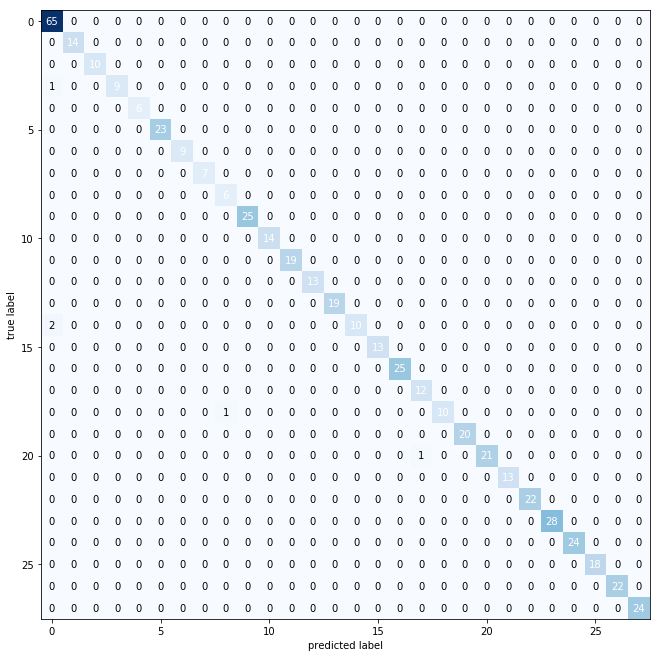

In [105]:
#construct a multiclass confusion matrix here
import numpy as np


def confusion_matrix_multiclass(y_true, y_predicted):

    matrix = np.zeros(28*28).reshape(28, 28).astype(int)
    for i,j in zip(y_true, y_predicted):
        if i == j:
            matrix[i, i] += 1
        else:
            matrix[i, j] += 1
    
    return matrix

y_true =      y_test
y_predicted = model.predict(X_test)

result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

#plot the confussion matrix
from helper import plot_confusion_matrix


plot_confusion_matrix(result_matrix, figsize = (len(result_matrix)*0.4, len(result_matrix)*0.4))
plt.show()

Use KNN model here

In [64]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [82]:
acc = knn.score(X_test, y_test)*100
print("Accuracy %.1f%%" % acc)

Accuracy 97.6%


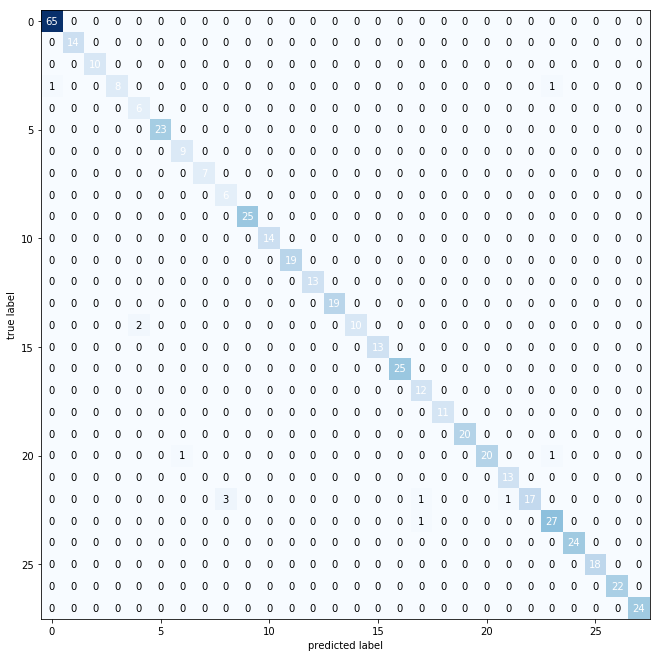

In [106]:
#construct a multiclass confusion matrix here
import numpy as np


def confusion_matrix_multiclass(y_true, y_predicted):

    matrix = np.zeros(28*28).reshape(28, 28).astype(int)
    for i,j in zip(y_true, y_predicted):
        if i == j:
            matrix[i, i] += 1
        else:
            matrix[i, j] += 1
    
    return matrix

y_true =      y_test
y_predicted = knn.predict(X_test)

result_matrix = confusion_matrix_multiclass(y_true, y_predicted)
result_matrix

#plot the confussion matrix
from helper import plot_confusion_matrix


plot_confusion_matrix(result_matrix, figsize = (len(result_matrix)*0.4, len(result_matrix)*0.4))
plt.show()

Use the Argumentor dataset here

In [161]:
from sklearn.ensemble import RandomForestClassifier
from PIL import Image
import glob
import numpy as np
import torchvision 

def load_image(file_name):
    img = Image.open(file_name)
    img = torchvision.transforms.functional.resize(img, 28, interpolation=2)
    img = img.convert('1')
    img = np.array(img,np.uint8)
    data = img.reshape(-1)
    #data = data[np.newaxis, :]
    return data

In [162]:
new_x_test = []
new_y_test = []

y_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R','S','T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']

for i in range(0, len(y_label)):
    path = '/Users/qintaoying/Desktop/STAT-479/GP/asl-alphabet/pre_data/test/'+ y_label[i] +'/*.jpg'
    for filename in glob.glob(path):
        im = load_image(filename)
        new_x_test.append(im)
        new_y_test.append(i)
        
print(new_y_test)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [163]:
from mlxtend.preprocessing import shuffle_arrays_unison
y_label = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 
           'O', 'P', 'Q', 'R','S','T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'space', 'nothing', 'del']

x = []
y = []

model = RandomForestClassifier(n_estimators = 100, random_state = 7)
for i in range(0, len(y_label)):
    path = '/Users/qintaoying/Desktop/STAT-479/GP/asl-alphabet/asl_alphabet_train/'+ y_label[i] +'/output/*.jpg'
    for filename in glob.glob(path):
        im = load_image(filename)
        x.append(im)
        y.append(i)

x = np.array(x)
y = np.array(y)

x,y = shuffle_arrays_unison((x, y), random_seed=1)
X_train, y_train = x[:64800], y[:64800]
X_test, y_test = x[64800:], y[64800:]

print(X_train.shape)
print(y_train.shape)
model.fit(X_train, y_train)

(64800, 784)
(64800,)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=7, verbose=0, warm_start=False)

In [164]:
acc = model.score(X_test, y_test)*100
print('Accuracy %.1f%%' % acc)

Accuracy 87.1%


In [165]:
acc = model.score(new_x_test, new_y_test)*100
print('Accuracy %.1f%%' % acc)

Accuracy 3.4%


In [147]:
model.predict(new_x_test)

array([ 4, 28,  4,  4,  4,  4,  0,  4,  4,  2,  4,  4,  4,  4,  4,  4,  4,
       28,  4, 28,  4,  4,  4,  4, 28,  4,  4,  4, 28])